In [1]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
trainData = pd.read_csv('./Train.csv')
testData = pd.read_csv('./Test.csv')
trainData['Datetime'] = pd.to_datetime(trainData["Datetime"], format='%Y-%m-%d')
testData['Datetime'] = pd.to_datetime(testData["Datetime"], format='%Y-%m-%d')
trainData.rename(columns={'Datetime': 'ds', 'DailyMinimumDryBulbTemperature': 'y'}, inplace=True)  # 转化为prophet要求的形式

In [3]:
# trainData['y'] = (trainData['y'] - trainData['y'].mean()) / (trainData['y'].std())

In [4]:
m = Prophet(holidays_prior_scale=0, yearly_seasonality=5 ,seasonality_mode='additive',
            changepoint_prior_scale=0.02, growth='linear' )  # 建立预测模型
m.fit(trainData)
future = m.make_future_dataframe(periods=720)  
# 往后预测720天，构建一个720天的数据框

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
forecast = m.predict(future)
df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # 前两个列分别是日期和预测值，后面两个是预测的上下限
df.tail()

,ds,yhat,yhat_lower,yhat_upper
3591,2020-10-31,24.278685,15.140267,34.225589
3592,2020-11-01,24.348661,13.687975,34.430525
3593,2020-11-02,24.235152,14.647111,34.219997
3594,2020-11-03,24.180136,14.367157,35.080830
3595,2020-11-04,24.266897,13.946693,34.767289


In [6]:
mse = mean_squared_error(testData.DailyMinimumDryBulbTemperature, df[2876:].yhat)
rmse = sqrt(mean_squared_error(testData.DailyMinimumDryBulbTemperature, df[2876:].yhat))
mse,rmse

(58.46611890277036, 7.64631407298774)

In [7]:
df.to_csv("result_prophet.csv")

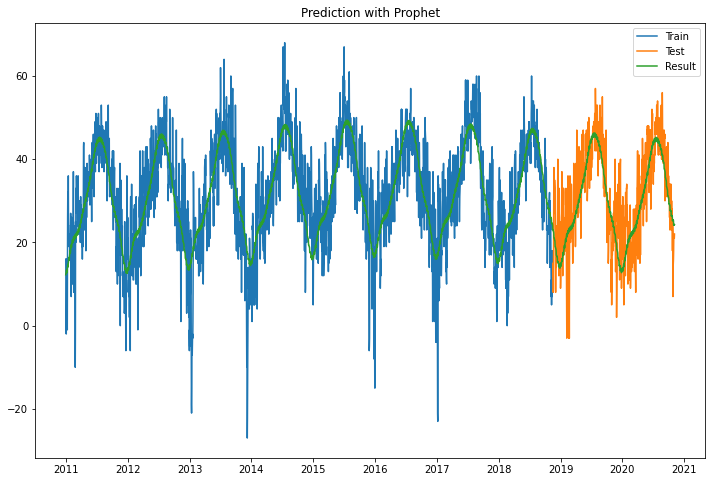

In [8]:
plt.figure(figsize=(12,8))
plt.plot(trainData.ds, trainData['y'], label='Train')
plt.plot(testData.Datetime, testData['DailyMinimumDryBulbTemperature'], label='Test')
plt.plot(df.ds, df['yhat'],  label='Result')
plt.legend(loc='best')
plt.title('Prediction with Prophet')
# plt.savefig('./res.png')
plt.show()